In [544]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import math

# Colour Scheme
plt.style.use('seaborn-darkgrid')
# dark style colours
plt.rcParams["image.cmap"] = "Dark2"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)
plt.rcParams["figure.figsize"] = (8,8)
# title font
tinygraph = False
textsize = 12
if tinygraph:
    plt.rcParams['font.size'] = 24
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titleweight'] = 'bold'

    # axis font
    plt.rcParams['axes.labelsize'] = 26
    # legend font size
    plt.rcParams['legend.fontsize'] = 12
    textsize = 22
else:
    plt.rcParams['font.size'] = 18
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['axes.titleweight'] = 'bold'

    # axis font
    plt.rcParams['axes.labelsize'] = 16
    # legend font size
    plt.rcParams['legend.fontsize'] = 12
    textsize = 14

In [545]:
# Just some quick L1 errors calculations
density1  = 0.4034267137901847
pressure1 = 0.9575360232136566
velocity1 = 0.9430281921930326

density2  = 0.4034503217059297
pressure2 = 0.9574576663760113
velocity2 = 0.9429598782110481

densitydiffp  = (abs(density1 - density2) / density2)   * 100.0
pressurediffp = (abs(pressure1 - pressure2) / density2) * 100.0
velocitydiffp = (abs(velocity1 - velocity2) / density2) * 100.0

print(f"Density  L1 Error Difference: {densitydiffp:.5f}%")
print(f"Pressure L1 Error Difference: {pressurediffp:.5f}%")
print(f"Velocity L1 Error Difference: {velocitydiffp:.5f}%")

Density  L1 Error Difference: 0.00585%
Pressure L1 Error Difference: 0.01942%
Velocity L1 Error Difference: 0.01693%


In [546]:
# Load Data
sph_exa = ['sphexa','sphexa_cuda']

sedov_versions = ['sedov_wone',
            'sedov_cstone',
            'sedov_west',
            'sedov_wisb',
            'sedov_wser',
            'sphexa_cuda_nogpu',
            ]

vipers = ['viper_sedov_wone','viper_sphexa']

outputdir = "./out/"



In [547]:
def to_sci_notation(num):
    exponent = int(math.log10(abs(num)))
    mantissa = num / 10**exponent
    return f"{mantissa:.0f}x10^{exponent}"


In [548]:
# Matplotlib 
plt.rcParams['legend.fontsize'] = 'large'

In [549]:
allresults = []
# Read file line by line
for sedov_version in sedov_versions + sph_exa + vipers:
    print(sedov_version)
    dir = outputdir + sedov_version + "/"
    configs = glob.glob(dir + "*.txt")
    # From all the configs with data on them in the directory, read in their times
    for config in configs:
        with open(config) as f:
            lines = f.readlines()
            lines = [line.strip() for line in lines]
            times = []
            for line in lines:
                # Check file exists
                try:
                    with open(outputdir + "slurms/" + line) as f2:
                        lines2 = f2.readlines()
                        lines2 = [line2.strip() for line2 in lines2]
                        if len(lines2) > 0:
                            times.append(lines2[0])
                except FileNotFoundError:
                    print("File not found: " + line)
                except IsADirectoryError:
                    print("Is a directory: " + line)

            config_split = config.split("-")
            n_particles         = int(config_split[0].split("/")[-1])
            totalparticles      = n_particles * n_particles * n_particles
            timestep            = float(config_split[1])
            threads             = int(config_split[2])
            # if config split 3 is an int
            nodes = 1
            if config_split[3].isdigit():
                nodes = int(config_split[3])
            times               = [float(time) for time in times]
            if 'viper' in sedov_version:
                times = [time for time in times if time > 20]

            avgtime             = np.mean(times)
            
            times = sorted(times)
            mid_index = len(times) // 2
            # Remove first and last time outliers
            trueavg = np.mean(times[mid_index-1:mid_index+2]) if len(times) > 4 else avgtime
            stdev = np.std([float(time) for time in times])

            truestdev = np.std(times[1:-1]) if len(times) > 2 else stdev
            trials = len(times)
            if (".txt" in config_split[3]):
                output = config_split[3] != 'no' # Whether output was enabled
            elif (len(config_split) == 6):
                output = config_split[3] != 'no'
            else:
                output = config_split[4] != 'no' # Whether output was enabled

            if sedov_version == 'sphexa':
                print(config_split)
            allresults.append([sedov_version,output,n_particles,totalparticles,timestep,threads,nodes,avgtime,trueavg,stdev,truestdev,trials])
        

print(allresults)

sedov_wone
File not found: slurm-.out
File not found: slurm-.out
File not found: slurm-.out
File not found: slurm-.out
File not found: slurm-924247.out
File not found: slurm-924265.out
File not found: slurm-924284.out
File not found: slurm-924259.out
File not found: slurm-924278.out
File not found: slurm-924296.out
File not found: slurm-.out
File not found: slurm-924253.out
File not found: slurm-924272.out
File not found: slurm-924290.out
File not found: slurm-.out
File not found: slurm-.out
sedov_cstone
sedov_west
sedov_wisb
File not found: slurm-879042.out
File not found: slurm-872832.out
sedov_wser
sphexa_cuda_nogpu
File not found: slurm-924057.out
File not found: slurm-924055.out
File not found: slurm-924058.out
File not found: slurm-924059.out
File not found: slurm-924053.out
File not found: slurm-924054.out
sphexa
['./out/sphexa/200', '100', '32', '5', 'no', 'out', 'jobs.txt']
['./out/sphexa/40', '100', '1', '1', 'no', 'out', 'jobs.txt']
['./out/sphexa/20', '100', '40', '1', 'no'

/dcs/20/u2054054/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/dcs/20/u2054054/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/dcs/20/u2054054/.local/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/dcs/20/u2054054/.local/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/dcs/20/u2054054/.local/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


['./out/sphexa/200', '100', '40', '1', 'no', 'out', 'jobs.txt']
File not found: slurm-.out
['./out/sphexa/126', '100', '32', '', 'no', 'out', 'jobs.txt']
File not found: slurm-.out
['./out/sphexa/40', '100', '1', '', 'no', 'out', 'jobs.txt']
['./out/sphexa/300', '100', '40', '3', 'no', 'out', 'jobs.txt']
['./out/sphexa/200', '100', '16', '4', 'no', 'out', 'jobs.txt']
['./out/sphexa/30', '100', '32', '1', 'no', 'out', 'jobs.txt']
['./out/sphexa/200', '100', '32', '4', 'no', 'out', 'jobs.txt']
['./out/sphexa/200', '100', '40', '3', 'no', 'out', 'jobs.txt']
['./out/sphexa/200', '100', '32', '1', 'no', 'out', 'jobs.txt']
['./out/sphexa/30', '100', '16', '1', 'no', 'out', 'jobs.txt']
['./out/sphexa/200', '100', '16', '2', 'no', 'out', 'jobs.txt']
['./out/sphexa/100', '100', '2', '1', 'no', 'out', 'jobs.txt']
['./out/sphexa/51', '100', '2', '1', 'no', 'out', 'jobs.txt']
['./out/sphexa/20', '100', '32', '1', 'no', 'out', 'jobs.txt']
['./out/sphexa/100', '100', '16', '3', 'no', 'out', 'jobs.tx

In [550]:
allresults = pd.DataFrame(allresults)
allresults.columns = ['Version','Output','n_particles','Total Particles','Timestep','Threads','Nodes','AvgTime','TrueAvgTime','Stdev','TrueStdev','Trials']
# print(allresults)
allresults['TotalThreads'] = allresults['Threads'] * allresults['Nodes']
# print(allresults[allresults['Version'] == 'sedov_cstone'].sort_values(by=['Threads','Output']))

    Version  Output  n_particles  Total Particles  Timestep  Threads  Nodes  \
270  sphexa   False          100          1000000     100.0        1      1   
285  sphexa   False          100          1000000     100.0        2      1   
206  sphexa   False          100          1000000     100.0        4      1   
242  sphexa   False          100          1000000     100.0        8      1   
230  sphexa   False          100          1000000     100.0       16      1   
201  sphexa   False          100          1000000     100.0       32      1   
226  sphexa   False          100          1000000     100.0       40      1   

      AvgTime  TrueAvgTime      Stdev  TrueStdev  Trials  TotalThreads  
270  925.1275     925.1275   6.823446    2.07500       4             1  
285  477.2300     477.2300   8.995285    2.45000       4             2  
206  256.0900     256.0900   9.056282    1.59000       4             4  
242  141.4925     141.4925  10.848243    0.11000       4             8  
23

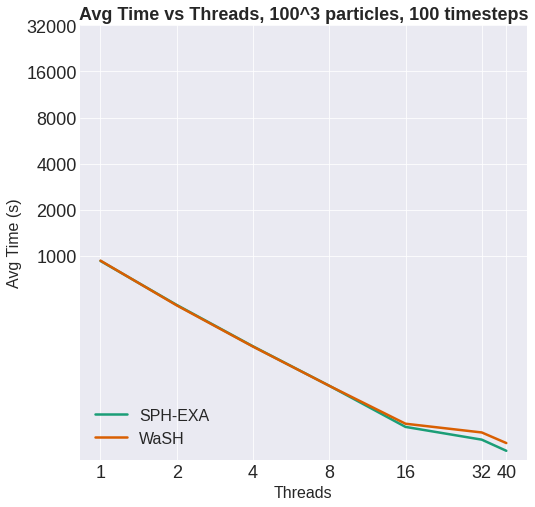

Difference between sphexa and sedov_wone: -4.67%
    Version  Output  n_particles  Total Particles  Timestep  Threads  Nodes  \
243  sphexa   False          200          8000000     100.0        1      1   
196  sphexa   False          200          8000000     100.0        2      1   
238  sphexa   False          200          8000000     100.0        4      1   
211  sphexa   False          200          8000000     100.0        8      1   
203  sphexa   False          200          8000000     100.0       16      1   
282  sphexa   False          200          8000000     100.0       32      1   
274  sphexa   False          200          8000000     100.0       40      1   

         AvgTime  TrueAvgTime     Stdev  TrueStdev  Trials  TotalThreads  
243  7382.280000  7382.280000  0.000000   0.000000       1             1  
196  3895.850000  3895.850000  0.000000   0.000000       1             2  
238  1977.450000  1977.450000  0.000000   0.000000       1             4  
211  1102.530000  

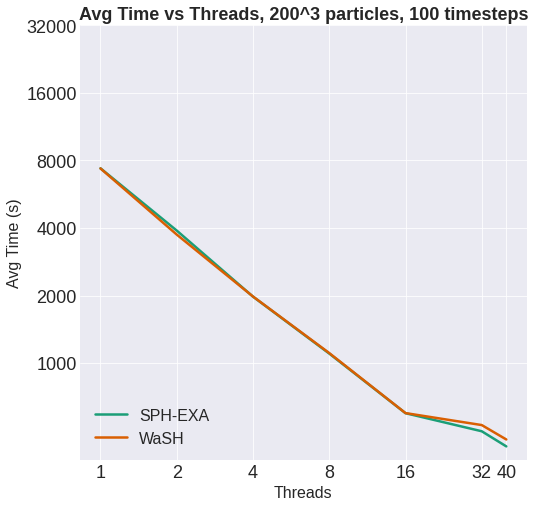

Difference between sphexa and sedov_wone: -0.11%
    Version  Output  n_particles  Total Particles  Timestep  Threads  Nodes  \
205  sphexa   False          300         27000000     100.0        1      1   
268  sphexa   False          300         27000000     100.0        2      1   
239  sphexa   False          300         27000000     100.0        4      1   
272  sphexa   False          300         27000000     100.0       16      1   
244  sphexa   False          300         27000000     100.0       32      1   
289  sphexa   False          300         27000000     100.0       40      1   

        AvgTime  TrueAvgTime     Stdev  TrueStdev  Trials  TotalThreads  
205  25007.2800   25007.2800  0.000000      0.000       1             1  
268  12797.2500   12797.2500  0.000000      0.000       1             2  
239   6865.5300    6865.5300  0.000000      0.000       1             4  
272   2076.0400    2076.0400  0.000000      0.000       1            16  
244   1702.7800    1702.780

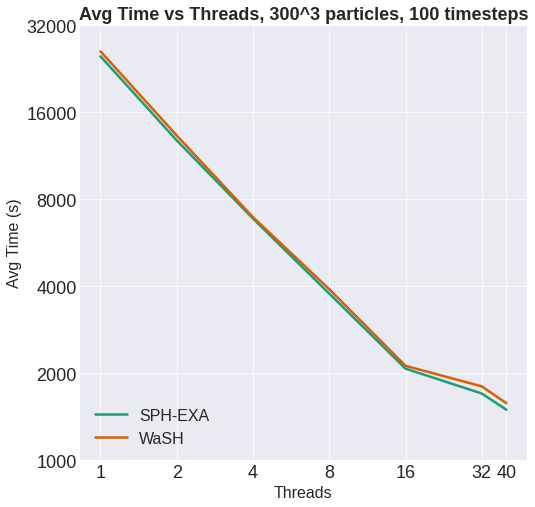

Difference between sphexa and sedov_wone: -2.22%


In [551]:
def runtimes_plot(df, versions,sizes=[20],time=100,output=None,title=None,multinode=False,basethreads=40):
    # subplot for each size
    threadnums = [1,2,4,8,16,32,40]
    for size in sizes:
        fig, ax = plt.subplots()
        times = {}
        for version in versions:
            data = df[df['Version'] == version]
            data = data[data['n_particles'] == size]
            data = data[data['Timestep'] == time]
            data = data.sort_values(by='Threads')
            data = data[data['AvgTime'].notnull()]
            data = data[(data['Nodes'] == 1) | 
            ((data['Nodes'] % 2 == 0) & (data['Threads'] == basethreads))]
            if multinode == False:
                data = data[data['Nodes'] == 1]
            else:
                data = data.sort_values(by='TotalThreads')
            
            if "sphexa" in version:
                label = "SPH-EXA"
            else:
                label = "WaSH"

            if False:
            # if (version == 'sedov_wisb' or version == 'sedov_west') and not data['AvgTime'].isnull().all():
                y = data['AvgTime'].mean()
                threadnums = [1,2,4,8,16,32,40]
                plt.plot(threadnums,[y]*len(threadnums), label=version,linewidth=2.5)
            # elif version != 'sedov_wisb':
            else:
                # print(data['Nodes'])
                print(data)
                ax.plot(data['Threads']*data['Nodes'], data['AvgTime'], label=label,linewidth=2.5)

            times[version] = data[data['Threads'] == 16]['AvgTime']
        # larger size
        # plt.xlabel('Threads')
        # plt.ylabel('Avg Time')
        # plt.yscale('log')
        # plt.xscale('log')
        # plt.grid(True)
        # plt.ylim(bottom=0)
        # plt.xlim(left=1)
        ax.set_xlabel('Threads')
        ax.set_ylabel('Avg Time (s)')
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.grid(True)
        ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())
        ax.set_yticks([1000,2000,4000,8000,16000,32000])
        # ax.set_ylim(bottom=1)
        # ax.set_xlim(left=0)


        # xticks threads
        ax.set_xticks([1,2,4,8,16,32,40])
        ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
        # equal axes
        # plt.axis('equal')
        # Legend in top right
        plt.legend(loc='lower left',fontsize=16)

        # plt.legend()
        if title is not None:
            plt.title(title)
        else:
            plt.title(f'Avg Time vs Threads, {size}^3 particles, {time} timesteps')
        # Make bigger legend
        
        plt.show()
        print(f"Difference between {versions[0]} and {versions[1]}: {(times[versions[0]].mean() - times[versions[1]].mean())/times[versions[1]].mean() * 100:.2f}%")
# runtimes_plot(allresults[allresults['Output'] == False], ['sedov_west','sedov_wser','sedov_wisb','sedov_cstone','sphexa','sedov_wone'],sizes=[20,30],time=100)

# runtimes_plot(allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],sizes=[100],time=100,multinode=True,basethreads=40)

runtimes_plot(allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],sizes=[100,200,300],time=100,multinode=False,basethreads=40)
# runtimes_plot(allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],sizes=[200],time=100,multinode=False,basethreads=40)

In [552]:
def summary_bar_plot(df, versions, sizes=[20],time=100,basethreads=40,title=None):
    for size in sizes:
        for version in versions:
            output_times = []
            no_output_times = []
            output_stdevs = []
            no_output_stdevs = []
            thread_values = [1, 2, 4, 8, 16, 32, 40]
            for threads in thread_values:
                data = df[(df['Version'] == version)  & 
                          (df['n_particles'] == size) & 
                          (df['Timestep'] == time)    & 
                          (df['Threads'] == threads)  &
                          (df['Nodes'] == 1)]
                no_output = data[data['Output'] == False]
                # if not output['AvgTime'].isnull().all() and not no_output['AvgTime'].isnull().all():
                no_output_times.append(no_output['AvgTime'].mean())
                no_output_stdevs.append(no_output['Stdev'].mean())

            bar_width = 0.35
            r1 = np.arange(len(thread_values))
            r2 = [x + bar_width for x in r1]
            
            label = version
            
            if (len(r1) != len(output_times)):
                print(version)
                print(r1)
                print(output_times)
                print("ERROR")
            if (len(r2) != len(no_output_times)):
                print(r2)
                print(no_output_times)
                print("ERROR")
            plt.bar(r1, output_times, width=bar_width, edgecolor='grey', label=label,yerr=output_stdevs)
            plt.bar(r2, no_output_times, width=bar_width, edgecolor='grey', label=label,yerr=no_output_stdevs)
        
        plt.ylabel('Avg Time')
        # Calculate percentage difference and display it above the bars
        a = max(no_output_times)

        plt.xlabel('Threads', fontweight='bold')
        plt.xticks([r + bar_width / 2 for r in range(len(output_times))], thread_values)

        plt.title(f'{label} {size}^3 particles, {time} timestep')
        plt.legend()
        plt.show()
# summary_bar_plot(allresults[allresults['Output'] == False], ['sedov_west','sedov_wser','sedov_wisb','sedov_cstone','sphexa','sedov_wone'],sizes=[20,30],time=100)

# runtimes_plot(allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],sizes=[100],time=100,multinode=True,basethreads=40)

# summary_bar_plot(allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],sizes=[100,200,300],time=100,basethreads=40)
# runtimes_plot(allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],sizes=[200],time=100,multinode=False,basethreads=40)

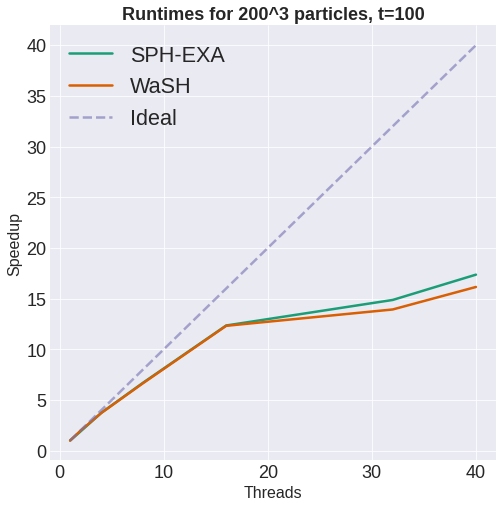

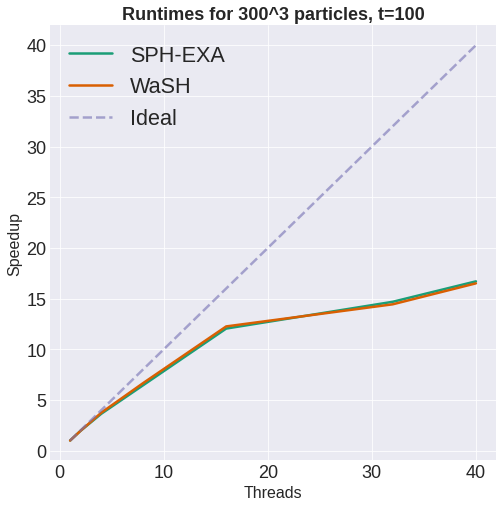

In [553]:
def strong_scaling_plot(df, versions,sizes=[20],time=100,basemulti=40):
    # subplot for each size
    for size in sizes:
        for version in versions:
            data = df[df['Version'] == version]
            data = data[data['n_particles'] == size]
            data = data[data['Timestep'] == time]
            data = data[(data['Nodes'] == 1)] # | 
            # ((data['Nodes'] % 2 == 0) & data['Threads'] == basemulti)]

            data = data.sort_values(by='TotalThreads')
            data = data[data['AvgTime'].notnull()]
            # print(data)
            label = "SPH-EXA" if "sphexa" in version else "WaSH"

            if data[data['Threads'] == 1]['AvgTime'].isnull().all():
                print(f"No base time data for {version} {size} {time}")
                continue
            basetime = data[data['Threads'] == 1]['AvgTime'].values[0]
            if (version == 'sedov_wisb' or version == 'sedov_west') and not data['AvgTime'].isnull().all():
                y = 1.0
                threadnums = [1,2,4,8,16,32,40]
                plt.plot(threadnums,[y]*len(threadnums), label=label,linewidth=2.5)
            elif version != 'sedov_wisb':
                plt.plot(data['TotalThreads'], 1/(data['AvgTime']/basetime), label=label,linewidth=2.5)
        # larger size
        # plot x=40

        plt.plot([1,40],[1,40],label='Ideal',linewidth=2.5,linestyle='--',alpha=0.6)
        plt.xlabel('Threads')
        plt.ylabel('Speedup')
        # plt.yscale('log')
        # plt.xscale('log')
        plt.grid(True)
        # equal axes
        # plt.axis('equal')
        plt.legend()
        plt.title(f'Runtimes for {size}^3 particles, t={time}')
        
        plt.show()
# strong_scaling_plot(allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],sizes=[20,30,100],time=100,basemulti=40)
strong_scaling_plot(allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],sizes=[200,300],time=100,basemulti=40)

Runtimes for 100^3 particles, t=100 with 16 threads per node


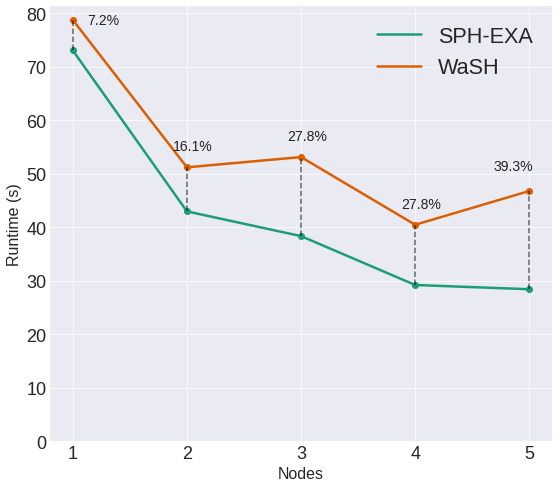

Runtimes for 100^3 particles, t=100 with 32 threads per node


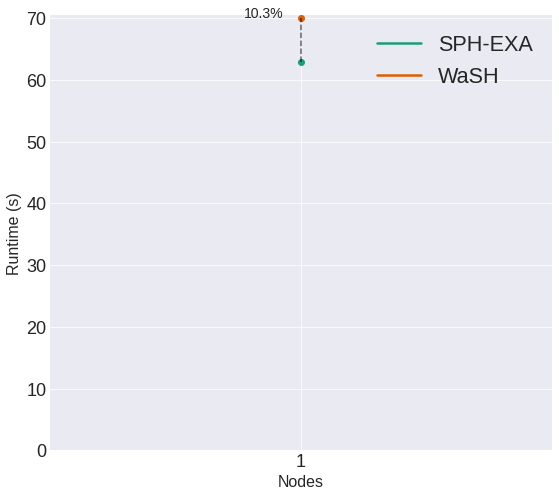

Runtimes for 100^3 particles, t=100 with 40 threads per node


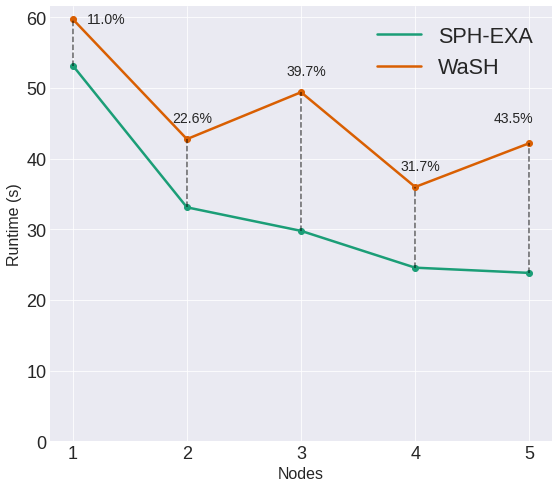

Runtimes for 200^3 particles, t=100 with 16 threads per node


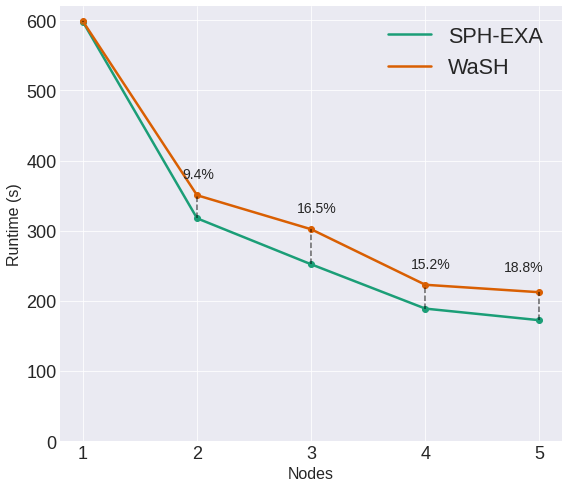

Runtimes for 200^3 particles, t=100 with 32 threads per node


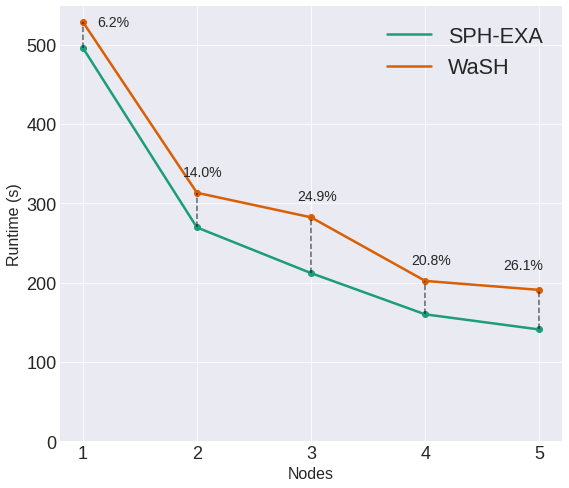

Runtimes for 200^3 particles, t=100 with 40 threads per node


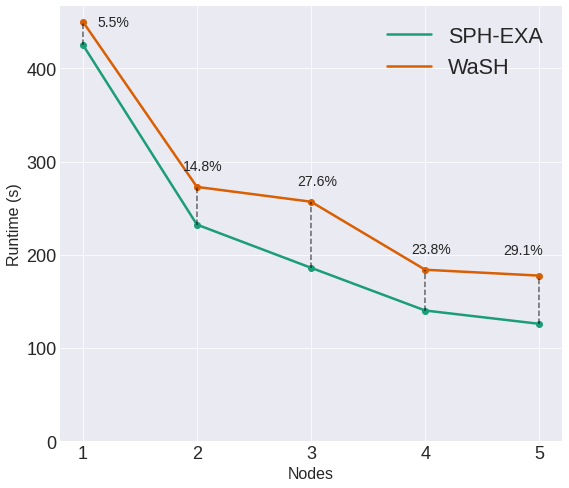

Runtimes for 300^3 particles, t=100 with 16 threads per node


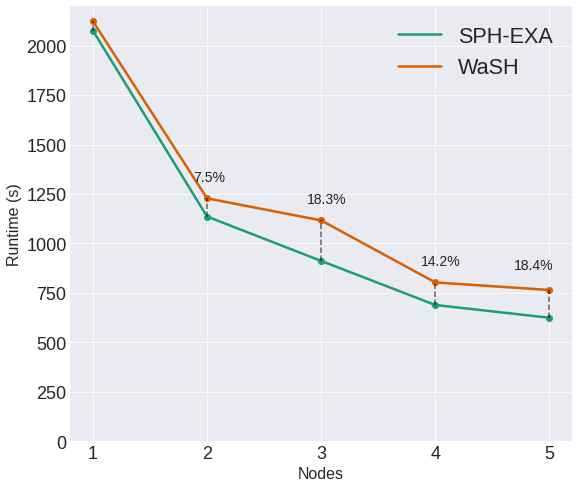

Runtimes for 300^3 particles, t=100 with 32 threads per node


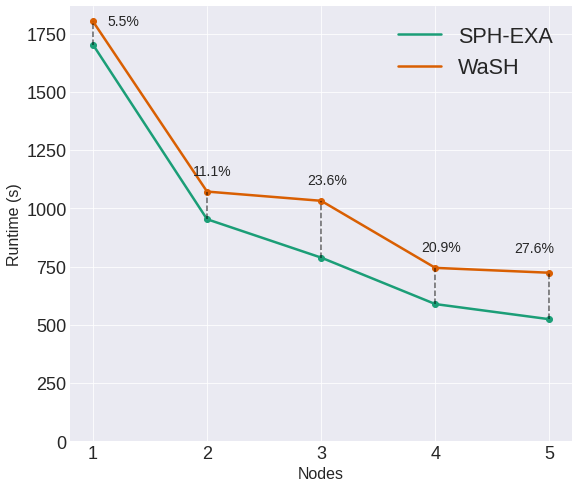

Runtimes for 300^3 particles, t=100 with 40 threads per node


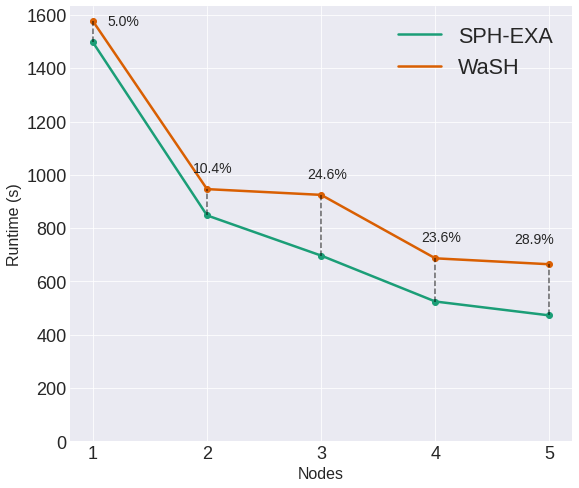

In [554]:
# Only Nodes
def strong_scaling_mpionly_plot(df, versions,sizes=[20],time=100,output=None,basethreads=40,logx=False,logy=False):
    # subplot for each size
    for size in sizes:
        nodenums = []
        nodenums2 = []
        timesexa = []
        timeswash = []
        plt.figure(figsize=(9,8))
        for version in versions:
            data = df[df['Version'] == version]
            data = data[data['n_particles'] == size]
            data = data[data['Timestep'] == time]
            data = data.sort_values(by='TotalThreads')
            data = data[data['AvgTime'].notnull()]
            data = data[data['Threads'] == basethreads]
            # 1 node or even
            # data = data[(data['Nodes'] == 1) | (data['Nodes'] % 2 == 0)]

            # if data[data['Threads'] == 1]['AvgTime'].isnull().all():
            #     print(f"No base time data for {version} {size} {time}")
            #     continue
            # basetime = data[data['Threads'] == 1]['AvgTime'].values[0]
            label = ""
            if version == 'sphexa' or version == 'viper_sphexa':
                label = "SPH-EXA"
            else:
                label = "WaSH"
                
            # Warn against low trials
            for d in data[data["Trials"] < 5].iloc:
                print(f"Warning: {version} {size} {time} {d['Threads']} {d['Nodes']}; {d['Trials']} trials")

            if (version == 'sedov_wisb' or version == 'sedov_west') and not data['AvgTime'].isnull().all():
                y = 1.0
                threadnums = [1,2,4,8,16,32,40]
                plt.plot(threadnums,[y]*len(threadnums), label=version,linewidth=2.5)


            elif version != 'sedov_wisb':
                plt.scatter(data['Nodes'], data['TrueAvgTime'])
                plt.plot(data['Nodes'], data['TrueAvgTime'], label=label,linewidth=2.5)
                # Display Difference for each number of nodes
                if 'sphexa' in version:
                    nodenums = list(data['Nodes'])
                    timesexa = list(data['TrueAvgTime'])
                elif 'sedov_wone' in version:
                    nodenums2 = list(data['Nodes'])
                    timeswash = list(data['TrueAvgTime'])
        # pad with zeros
        if len(nodenums) > len(timeswash):
            timeswash = [1.0]*(len(nodenums) - len(timeswash)) + timeswash
        # if len(nodenums2) > len(timesexa):
            # timesexa += [1.0]*(len(nodenums2) - len(timesexa))
        diffs = [(abs(timesexa[i] - timeswash[i])/timeswash[i])*100.0 for i in range(len(nodenums))]
        if len(timesexa) > 0 and len(timeswash) > 0:
            maxtime = max(max(timesexa),max(timeswash))

        for i in range(len(nodenums)):
            plt.plot([nodenums[i],nodenums[i]],[timesexa[i],timeswash[i]],linewidth=1.5,color='black',linestyle='--',alpha=0.6)

            xoffset = 0.0
            yoffset = (maxtime/25.0)
            if i == 0: # Don't clip over the top
                xoffset += nodenums[-1]/20.0
                yoffset -= maxtime/20.0
            # if last i
            if i == len(nodenums)-1:
                xoffset -= nodenums[-1]/16.0
                yoffset += maxtime/100.0
            else:
                xoffset -= nodenums[-1]/40.0
            
            if diffs[i] > 5.0: # Don't show small diffs
                plt.text(nodenums[i]+xoffset,timeswash[i]+yoffset,f'{diffs[i]:.1f}%',fontsize=textsize)

            pass
        # larger size
        # plot x=40

        # plt.plot([1,12],[1,12],label='Ideal',linewidth=2.5,linestyle='--',alpha=0.6)
        plt.xlabel('Nodes')
        plt.ylabel('Runtime (s)')
        plt.grid(True)
        # Only labels for integer nodes
        # As long as max isn't NaN
        if data['Nodes'].max() != data['Nodes'].max():
            maxnodes = 1 
        else:
            maxnodes = int(data['Nodes'].max())+1
        plt.xticks(np.arange(1,maxnodes,1))
        if logy:
            plt.yscale('log')
        if logx:
            plt.xscale('log')
        # plt.yscale('log')
        # plt.xscale('log')
        # ymin
        plt.ylim(bottom=0)
        # equal axes
        # plt.axis('equal')
        plt.legend()
        # size = to_sci_notation(size*size*size)
        title = f'Runtimes for {size}^3 particles, t={time} with {basethreads} threads per node'
        print(title)
        # plt.title(title)
        
        plt.show()
strong_scaling_mpionly_plot(allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],sizes=[100],time=100,basethreads=16)
strong_scaling_mpionly_plot(allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],sizes=[100],time=100,basethreads=32)
strong_scaling_mpionly_plot(allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],sizes=[100],time=100)
strong_scaling_mpionly_plot(allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],sizes=[200],time=100,basethreads=16)
strong_scaling_mpionly_plot(allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],sizes=[200],time=100,basethreads=32)
strong_scaling_mpionly_plot(allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],sizes=[200],time=100)
strong_scaling_mpionly_plot(allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],sizes=[300],time=100,basethreads=16)
strong_scaling_mpionly_plot(allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],sizes=[300],time=100,basethreads=32)
strong_scaling_mpionly_plot(allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],sizes=[300],time=100)



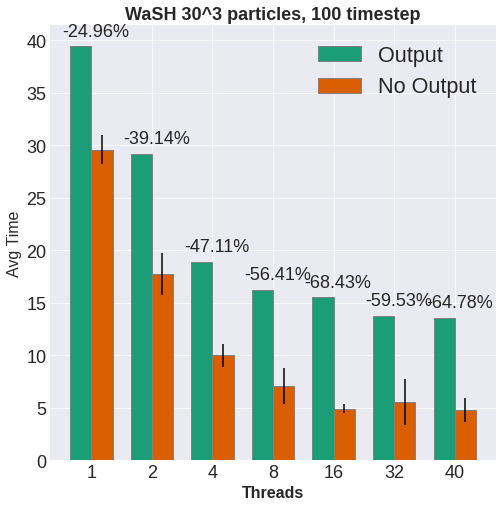

/dcs/20/u2054054/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


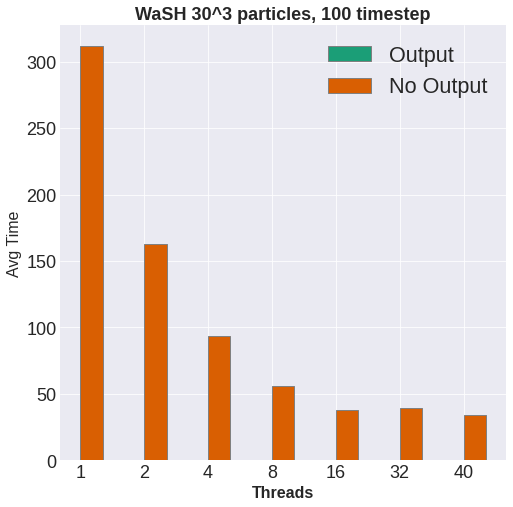

/dcs/20/u2054054/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


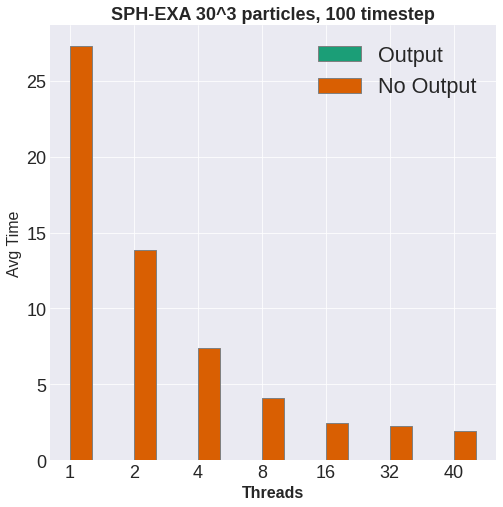

In [555]:
# Bar graphs for each version output vs no output

def output_bar_graph(df, versions, sizes=[20], time=100):
    for size in sizes:
        for version in versions:
            output_times = []
            no_output_times = []
            output_stdevs = []
            no_output_stdevs = []
            thread_values = [1, 2, 4, 8, 16, 32, 40]
            for threads in thread_values:
                data = df[(df['Version'] == version)  & 
                          (df['n_particles'] == size) & 
                          (df['Timestep'] == time)    & 
                          (df['Threads'] == threads)  &
                          (df['Nodes'] == 1)]
                output = data[data['Output'] == True]
                no_output = data[data['Output'] == False]
                # if not output['AvgTime'].isnull().all() and not no_output['AvgTime'].isnull().all():
                output_times.append(output['AvgTime'].mean())
                no_output_times.append(no_output['AvgTime'].mean())
                output_stdevs.append(output['Stdev'].mean())
                no_output_stdevs.append(no_output['Stdev'].mean())

            bar_width = 0.35
            r1 = np.arange(len(thread_values))
            r2 = [x + bar_width for x in r1]
            
            label = ""
            if version == 'sphexa' or version == 'viper_sphexa':
                label = "SPH-EXA"
            else:
                label = "WaSH"
            if (len(r1) != len(output_times)):
                print(version)
                print(r1)
                print(output_times)
                print("ERROR")
            if (len(r2) != len(no_output_times)):
                print(r2)
                print(no_output_times)
                print("ERROR")
            plt.bar(r1, output_times, width=bar_width, edgecolor='grey', label='Output',yerr=output_stdevs)
            plt.bar(r2, no_output_times, width=bar_width, edgecolor='grey', label='No Output',yerr=no_output_stdevs)
            plt.ylabel('Avg Time')
            # Calculate percentage difference and display it above the bars
            a = max(output_times + no_output_times)
            for i in range(len(output_times)):
                perc_diff = (no_output_times[i] - output_times[i]) / output_times[i] * 100
                
                plt.text(r1[i]+0.25, output_times[i] + (a/40.0), f'{perc_diff:.2f}%', ha='center')
                # plt.text(r2[i], no_output_times[i] + 0.05, f'{perc_diff:.2f}%', ha='center')

            plt.xlabel('Threads', fontweight='bold')
            plt.xticks([r + bar_width / 2 for r in range(len(output_times))], thread_values)

            plt.title(f'{label} {size}^3 particles, {time} timestep')
            plt.legend()
            plt.show()
output_bar_graph(allresults, ['sedov_wone','sedov_cstone','sphexa'],sizes=[30],time=100)

    Version  Output  n_particles  Total Particles  Timestep  Threads  Nodes  \
188  sphexa   False           40            64000     100.0        1      1   
276  sphexa   False           40            64000     100.0        1      1   

     AvgTime  TrueAvgTime     Stdev  TrueStdev  Trials  TotalThreads  
188   63.955    63.866667  0.350892   0.280836      10             1  
276      NaN          NaN       NaN        NaN       0             1  
       Version  Output  n_particles  Total Particles  Timestep  Threads  \
1   sedov_wone   False           40            64000     100.0        1   
81  sedov_wone   False           40            64000     100.0        1   

    Nodes  AvgTime  TrueAvgTime     Stdev  TrueStdev  Trials  TotalThreads  
1       1   66.113    65.786667  1.341731   0.585187      10             1  
81      1      NaN          NaN       NaN        NaN       0             1  


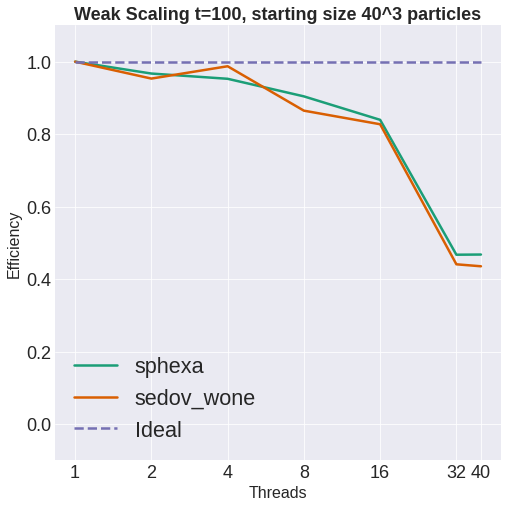

In [556]:
# Weak Scaling:
# Threads: 1 ,2 , 4, 8,16,32,40
# Sizes:   10,13,16,20,25,32,34
def weakscalingplot(mode,df,versions,time=100,output=None):
    fig, ax = plt.subplots()
    threads = [1,2,4,8,16,32,40]
    if mode == 'a':
        sizes =   [10,13,16,20,25,32,34]
    elif mode == 'b':
        sizes = [20,25,32,40,50,63,68]
    elif mode == 'c':
        sizes = [40,51,63,80,100,126,136]

    for version in versions:
        basetime = df[(df['Version'] == version) & 
                      (df['n_particles'] == sizes[0]) & 
                      (df['Timestep'] == time) &
                      (df['Nodes'] == 1) &
                      (df['Threads'] == 1)]['AvgTime'].mean()
        times = []
        for i in range(len(sizes)):
            data = df[df['Version'] == version]
            data = data[data['n_particles'] == sizes[i]]
            data = data[data['Timestep'] == time]
            data = data[data['Nodes'] == 1]
            data = data[data['Threads'] == threads[i]]

            data = data[data['Output'] == False]
            # if 1 thread
            if not data[data['Threads'] == 1].empty:
                print(data)
            times.append(data['AvgTime'].mean())
        efficiency = [basetime / time for time in times]
        ax.plot(threads,efficiency,label=version,linewidth=2.5)

    # Base Line dashes
    ax.set_ylim(-0.1,1.1)

    ax.set_xlabel('Threads')
    ax.set_ylabel('Efficiency')

    ax.set_xscale('log')
    
    ax.set_xticks([1,2,4,8,16,32,40])
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

    # xticks threads
    # plt.xticks(threads)

    plt.plot(threads,[1]*len(threads),label='Ideal',linewidth=2.5,linestyle='--')
    plt.legend()
    plt.title(f'Weak Scaling t={time}, starting size {sizes[0]}^3 particles')
    plt.show()


# weakscalingplot('a',allresults, ['sphexa','sedov_wone'],time=100)
# weakscalingplot('b',allresults, ['sphexa','sedov_wone'],time=100)
weakscalingplot('c',allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],time=100)

# SPH-EXA CUDA Results

Speedup for 50^3 particles: 2.6923076923076925


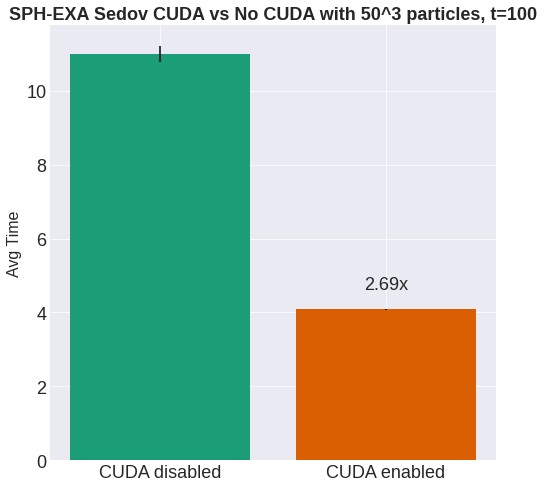

Speedup for 100^3 particles: 4.305006055712558


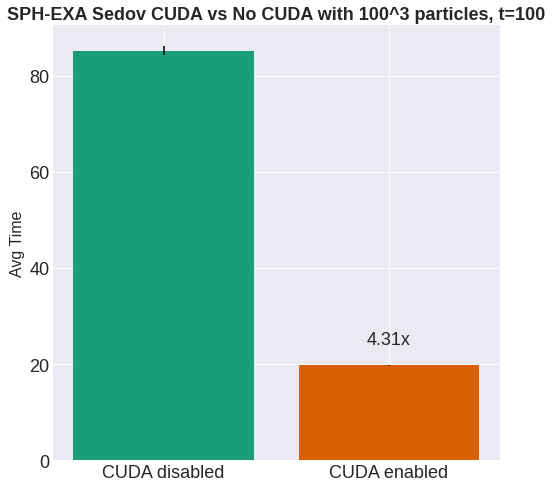

Speedup for 200^3 particles: 5.008462554419606


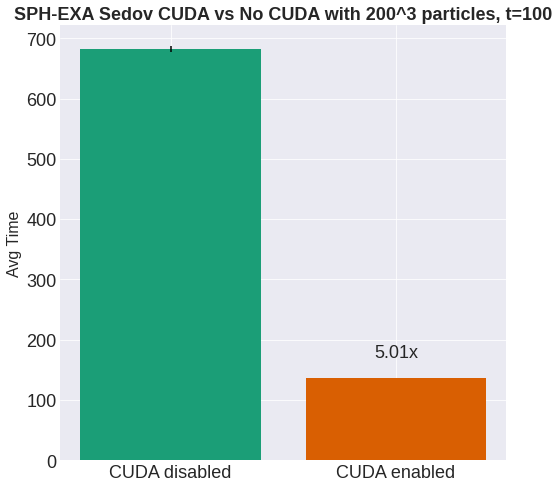

In [557]:
# sphexa vs sphexa-cuda
def vscuda(df,sizes=[50,100,200],time=100):
    threads = 12
    versions = ['sphexa_cuda_nogpu','sphexa_cuda']
    # Bar plot for each size, sphexa_cuda and sphexa_cuda_nogpu adjacent
    originaltime = 0.0
    newtime = 0.0
    for size in sizes:
        for version in versions:
            data = df[df['Version'] == version]
            data = data[data['n_particles'] == size]
            data = data[data['Timestep'] == time]
            data = data[data['Threads'] == threads]
            data = data[data['Output'] == False]
            if data['AvgTime'].isnull().all():
                print(f"No data for {version} {size} {time}")
                continue
            avgtime = data['AvgTime'].mean()
            stdev = data['Stdev'].mean()
            if version == 'sphexa_cuda_nogpu':
                originaltime = avgtime
                label = "CUDA disabled"
            elif version == 'sphexa_cuda':
                newtime = avgtime
                label = "CUDA enabled"
            if originaltime != 0.0 and newtime != 0.0:
                speedup = originaltime / newtime
            else:
                speedup = 0.0
            if version == 'sphexa_cuda':
                plt.text(1,newtime+(originaltime*0.05),f'{speedup:.2f}x',ha='center')
            plt.bar(label,avgtime,yerr=stdev)
        print(f"Speedup for {size}^3 particles: {originaltime/newtime}")
        plt.ylabel('Avg Time')
        plt.title(f'SPH-EXA Sedov CUDA vs No CUDA with {size}^3 particles, t={time}')
        plt.show()

vscuda(allresults[allresults['Output'] == False],sizes=[50,100,200],time=100)

# Viper Results

Runtimes for 200^3 particles, t=100 with 4 threads per node


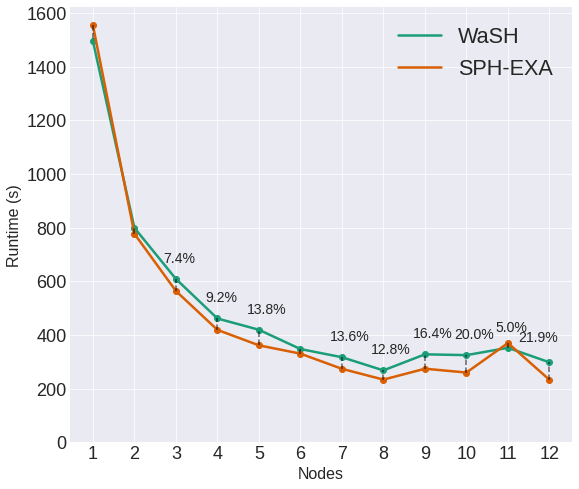

Runtimes for 200^3 particles, t=100 with 1 threads per node


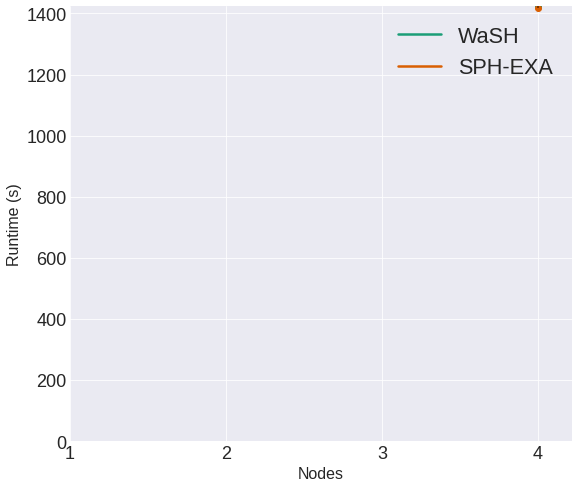

In [558]:
strong_scaling_mpionly_plot(allresults[allresults['Output'] == False], ['viper_sedov_wone','viper_sphexa'],sizes=[200],time=100,basethreads=4)
strong_scaling_mpionly_plot(allresults[allresults['Output'] == False], ['viper_sedov_wone','viper_sphexa'],sizes=[200],time=100,basethreads=1)

In [ ]:
strong_scaling_mpionly_plot(allresults[allresults['Output'] == False], ['noh_wone','noh_sphexa'],sizes=[200],time=100,basethreads=16)
strong_scaling_mpionly_plot(allresults[allresults['Output'] == False], ['noh_wone','noh_sphexa'],sizes=[200],time=100,basethreads=40)
